In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# K-means Clustering

- Tries to minimize within cluster sum of squares(wcss) and the sum of wcss determines the quality of clustering
- Uses Euclidean distance BUT Euclidean distance can be greatly affected by measurement unit and by strong correlations. Alternative is “Mahalanobis distance”
- Variations: K-medians, K-modes

- Steps of K-means
    - Step 1: Choose the number of clusters. we refer it by K
    - Step 2: Randomly select K centroids. These centroids can be from the dataset or could be any random point
    - Step 3: Assign each data point to the nearest centroid
    - Step 4: Recompute the new centroid and place the new centroid for each cluster
    - Step 5: Based on new centroid, check if any data points in the dataset can be reassigned to a different cluster, if the data points changed the cluster then go to step 3. If no reassignment happened then all the data points are grouped in K clusters.

In [2]:
# Read in Data
df = pd.read_csv("college.csv")

###### Data
- Private A factor with levels No and Yes indicating private or public university
- Apps Number of applications received
- Accept Number of applications accepted
- Enroll Number of new students enrolled
- Top10perc Pct. new students from top 10% of H.S. class
- Top25perc Pct. new students from top 25% of H.S. class
- F.Undergrad Number of fulltime undergraduates
- P.Undergrad Number of parttime undergraduates
- Outstate Out-of-state tuition
- Room.Board Room and board costs
- Books Estimated book costs
- Personal Estimated personal spending
- PhD Pct. of faculty with Ph.D.’s
- Terminal Pct. of faculty with terminal degree
- S.F.Ratio Student/faculty ratio
- perc.alumni Pct. alumni who donate
- Expend Instructional expenditure per student
- Grad.Rate Graduation rate

In [3]:
df = df.rename(columns={"Unnamed: 0": "Name"})

One variable named "private" showing whether the college is private or public school should be changed so that values are numbers

In [4]:
df['Private'] = np.where(df['Private']=='Yes',1,0)

In [5]:
df2 = df.drop('Name',axis=1)

In [6]:
# normalize the dataset
scaler = StandardScaler()
df2 = scaler.fit_transform(df2)

In [32]:
df2 = pd.DataFrame(df2, columns=['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'])

###### The Elbow Method to determine value of K

Text(0,0.5,'WCSS')

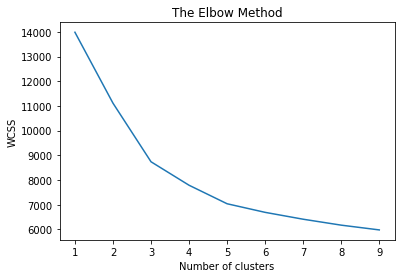

In [34]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

3 looks like the elbow, so we choose K=3

In [35]:
# Kmeans with 3 clusters
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=42)
kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [38]:
# Attaching cluster labels to data
df['Cluster Labels'] = kmeans.labels_

In [68]:
# Number of schools put into each cluster
df.groupby('Cluster Labels').size()

Cluster Labels
0    133
1    248
2    396
dtype: int64

In [40]:
# Average values of different variables by cluster 
df.groupby('Cluster Labels').mean()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cluster Labels,,,,,,,,,,,,,,,,,,
0,0.067669,8383.466165,5732.488722,2341.601504,27.323308,59.526316,12283.353383,2806.473684,7640.120301,3991.172932,582.413534,1833.714286,82.315789,87.984962,16.940602,14.774436,8469.278195,57.563910
1,0.975806,2907.580645,1757.463710,573.294355,42.427419,71.971774,2292.733871,303.435484,14684.270161,5177.487903,560.604839,1115.564516,84.955645,90.814516,11.584677,32.625000,13904.189516,78.334677
2,0.792929,1253.010101,935.199495,384.921717,18.325758,44.414141,1698.343434,545.590909,8723.648990,3967.058081,531.257576,1315.997475,61.717172,69.962121,14.701010,19.232323,7402.272727,60.055556


Cluster 0 seems to be mostly public schools (e.g. state universities) & Cluster 1 seems to be mostly private schools with high prestige (e.g. Ivy Leagues, prestigious liberal arts colleges) & Cluster 2 seems to be some mix of public and private schools with medium to lower prestige

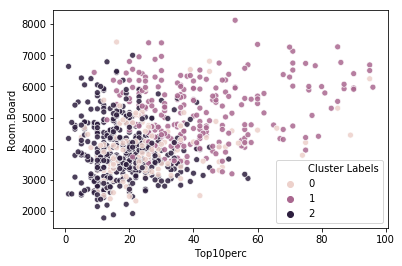

In [103]:
sns.scatterplot(x='Top10perc',y='Room.Board', data=df,hue='Cluster Labels',alpha=0.85)

# PCA

In [64]:
df3 = df.drop(['Name','Cluster Labels'],axis=1)

In [65]:
# normalize the dataset
scaler = StandardScaler()
df3 = scaler.fit_transform(df3)

In [66]:
df3 = pd.DataFrame(df3, columns=['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'])

In [57]:
from sklearn.decomposition import PCA

Text(0,0.5,'Cumulative proportion of variance explained')

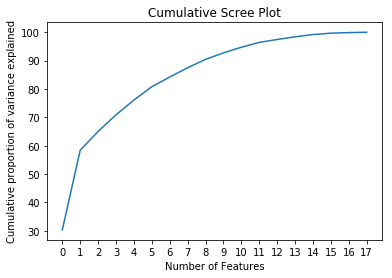

In [79]:
# Check for optimal number of features
pca = PCA(random_state=42)
pca.fit(df3)

cum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

# Cumulative scree plot
plt.plot(cum_var)
plt.title("Cumulative Scree Plot")
plt.xlabel("Number of Features")
plt.xticks(list(range(len(cum_var))))
plt.ylabel("Cumulative proportion of variance explained")

In [81]:
# PCA using one component (From the scree plot above, the elbow seems to be when number of features is one)
pca = PCA(n_components=1)
df3_pca = pca.fit_transform(df3)

In [97]:
# Apply K-means on data that has been transformed by PCA
kmeans2 = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=42)
kmeans2.fit(df3_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [98]:
df['Cluster Labels after PCA'] = kmeans2.labels_

In [99]:
# Number of schools put into each cluster
df.groupby('Cluster Labels after PCA').size()

Cluster Labels after PCA
0    366
1    311
2    100
dtype: int64

In [100]:
# Average values of different variables by cluster 
df.groupby(['Cluster Labels after PCA']).mean()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster Labels
Cluster Labels after PCA,,,,,,,,,,,,,,,,,,,
0,0.639344,1767.079235,1289.161202,570.180328,16.188525,42.346995,2796.103825,858.407104,7870.311475,3762.434426,533.510929,1432.103825,62.068306,70.133880,15.518306,16.775956,6958.885246,55.866120,1.699454
1,0.794212,3134.736334,2278.350482,855.681672,30.893891,61.980707,4067.376206,942.681672,11525.508039,4666.800643,553.231511,1315.000000,79.157556,85.881029,13.613826,25.890675,9969.446945,71.057878,1.077170
2,0.840000,7106.190000,3882.110000,1312.360000,58.800000,85.790000,5865.000000,572.160000,16474.330000,5573.720000,595.490000,1085.640000,91.220000,95.510000,10.341000,34.800000,18585.030000,83.190000,0.830000


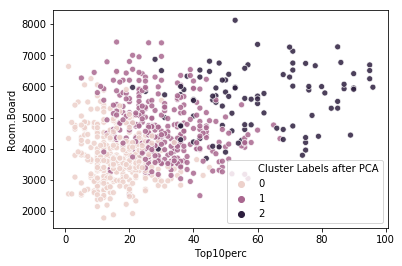

In [102]:
sns.scatterplot(x='Top10perc',y='Room.Board', data=df,hue='Cluster Labels after PCA',alpha=0.85)